# DATA ANALYSIS

In [1]:
import pandas as pd
df = pd.read_csv("Carbon Emission.csv")
df.head()


,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


In [2]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())


Shape: (10000, 20)
Columns: ['Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source', 'Transport', 'Vehicle Type', 'Social Activity', 'Monthly Grocery Bill', 'Frequency of Traveling by Air', 'Vehicle Monthly Distance Km', 'Waste Bag Size', 'Waste Bag Weekly Count', 'How Long TV PC Daily Hour', 'How Many New Clothes Monthly', 'How Long Internet Daily Hour', 'Energy efficiency', 'Recycling', 'Cooking_With', 'CarbonEmission']


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Body Type                      10000 non-null  object
 1   Sex                            10000 non-null  object
 2   Diet                           10000 non-null  object
 3   How Often Shower               10000 non-null  object
 4   Heating Energy Source          10000 non-null  object
 5   Transport                      10000 non-null  object
 6   Vehicle Type                   3279 non-null   object
 7   Social Activity                10000 non-null  object
 8   Monthly Grocery Bill           10000 non-null  int64 
 9   Frequency of Traveling by Air  10000 non-null  object
 10  Vehicle Monthly Distance Km    10000 non-null  int64 
 11  Waste Bag Size                 10000 non-null  object
 12  Waste Bag Weekly Count         10000 non-null  int64 
 13  Ho

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


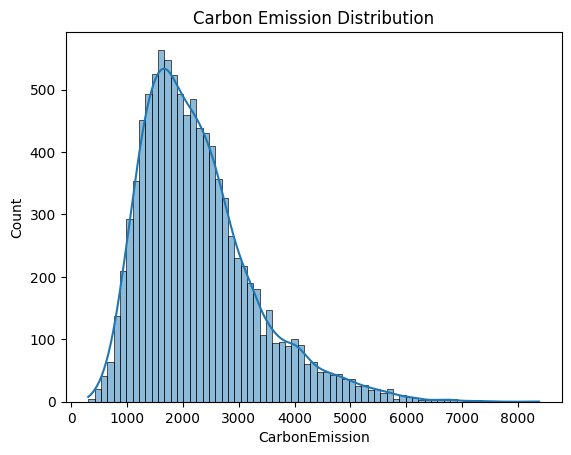

In [5]:
sns.histplot(df['CarbonEmission'], kde=True)
plt.title("Carbon Emission Distribution")
plt.show()


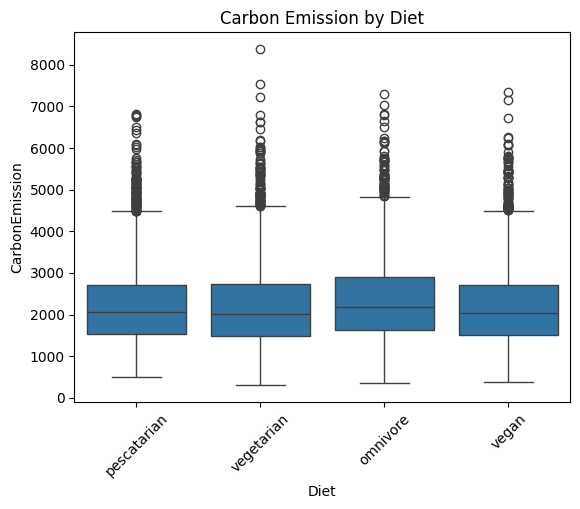

In [6]:
sns.boxplot(x='Diet', y='CarbonEmission', data=df)
plt.xticks(rotation=45)
plt.title("Carbon Emission by Diet")
plt.show()


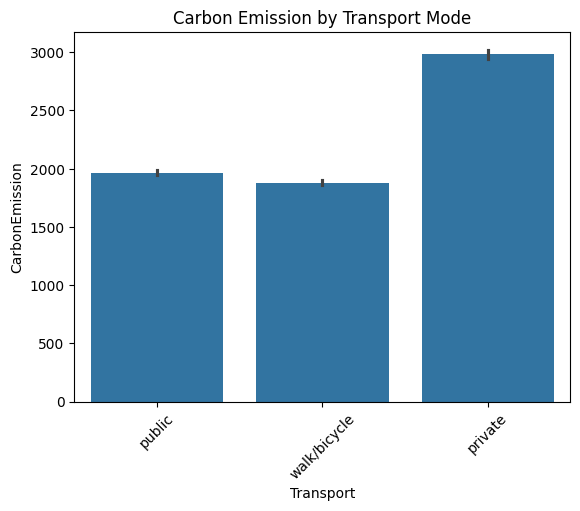

In [7]:
sns.barplot(x='Transport', y='CarbonEmission', data=df)
plt.xticks(rotation=45)
plt.title("Carbon Emission by Transport Mode")
plt.show()


# Model Building and Evaluation

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


NameError: name 'X_scaled' is not defined

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

cnn = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])
cnn.compile(optimizer='adam', loss='mse')
cnn.fit(X_train, y_train, epochs=10, verbose=1)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Decision Tree Prediction
y_pred_dt = dt.predict(X_test)

# Random Forest Prediction
y_pred_rf = rf.predict(X_test)

# CNN Prediction (make sure X_test_cnn is reshaped to image format if needed)
y_pred_cnn = cnn.predict(X_test)
y_pred_cnn = y_pred_cnn.flatten()  # if it's (n,1) shape

def evaluate(y_true, y_pred, name):
    print(f"{name} RMSE:", mean_squared_error(y_true, y_pred, squared=False))
    print(f"{name} R2 Score:", r2_score(y_true, y_pred))

evaluate(y_test, y_pred_dt, "Decision Tree")
evaluate(y_test, y_pred_rf, "Random Forest")
evaluate(y_test, y_pred_cnn, "CNN")


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Binning into categories
y_test_cat = pd.cut(y_test, bins=3, labels=[0,1,2])
y_pred_cat = pd.cut(y_pred_rf, bins=3, labels=[0,1,2])

cm = confusion_matrix(y_test_cat, y_pred_cat)
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix - Random Forest")
plt.show()


# Take Inputs & Predict Carbon Emission

In [ ]:
# After preprocessing and encoding your training data:
X = df_encoded.drop('CarbonEmission', axis=1)
y = df_encoded['CarbonEmission']

# Save this for later use in prediction
feature_columns = X.columns.tolist()# INPUT SECTION
raw_input = {
    'Monthly Grocery Bill': 150,
    'Vehicle Monthly Distance Km': 1000,
    'Waste Bag Weekly Count': 3,
    'How Long TV PC Daily Hour': 10,
    'How Many New Clothes Monthly': 5,
    'How Long Internet Daily Hour': 8,
    'Recycling': ['Paper', 'Plastic'],
    'Cooking_With': ['Microwave', 'Airfryer'],
    'Body Type': 'normal',
    'Diet': 'omnivore',
    'Transport': 'car',
    'Heating': 'electricity',
    'Energy Efficiency Class': 'A++'
}

# FUNCTION SECTION
def preprocess_input(raw_input, feature_columns, mlb_recycling, mlb_cooking, scaler):
    df_input = pd.DataFrame([raw_input])

    # Process list fields
    recycling_df = pd.DataFrame(
        mlb_recycling.transform([raw_input['Recycling']]), 
        columns=mlb_recycling.classes_
    )
    cooking_df = pd.DataFrame(
        mlb_cooking.transform([raw_input['Cooking_With']]), 
        columns=mlb_cooking.classes_
    )

    # Drop list fields
    df_input = df_input.drop(['Recycling', 'Cooking_With'], axis=1)

    # One-hot encode categorical columns
    df_input_encoded = pd.get_dummies(df_input)

    # Combine all features
    df_final = pd.concat([df_input_encoded, recycling_df, cooking_df], axis=1)

    # Reindex to match training feature columns
    df_final = df_final.reindex(columns=feature_columns, fill_value=0)

    # Scale the input
    input_scaled = scaler.transform(df_final)

    return input_scaled

# PREDICTION SECTION
input_scaled = preprocess_input(raw_input, feature_columns, mlb_recycling, mlb_cooking, scaler)
predicted_emission = rf.predict(input_scaled)

# OUTPUT SECTION
print("Predicted Carbon Emission:", predicted_emission[0])


In [ ]:
# Save all models using joblib (except Keras)
import joblib
joblib.dump(scaler, 'models/scaler.joblib')
joblib.dump(feature_columns, 'models/feature_columns.joblib')
joblib.dump(mlb_cooking, 'models/mlb_cooking.joblib')
joblib.dump(mlb_recycling, 'models/mlb_recycling.joblib')
joblib.dump(dt, 'models/dt_model.joblib')
joblib.dump(rf, 'models/rf_model.joblib')

# Save CNN model
cnn.save('models/cnn_model.h5')